## **Understand the dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('train.csv')
df.head()


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### 1463 cells of column 'Item _Weight' approx 17% and 2410 cells of column 'Outlet_Size' approx 28.3% are empty.


# data preprocessing

In [6]:
Item_weight_mean = df['Item_Weight'].mean()
df['Item_Weight_mean'] = df['Item_Weight'].fillna(Item_weight_mean) 
print(Item_weight_mean)

12.857645184135976


In [7]:
Item_weight_median = df['Item_Weight'].median()
df['Item_Weight_median'] = df['Item_Weight'].fillna(Item_weight_median) 
print(Item_weight_median)

12.6


In [8]:
df["Item_weight_interpolated"] = df['Item_Weight'].interpolate(method = "linear")

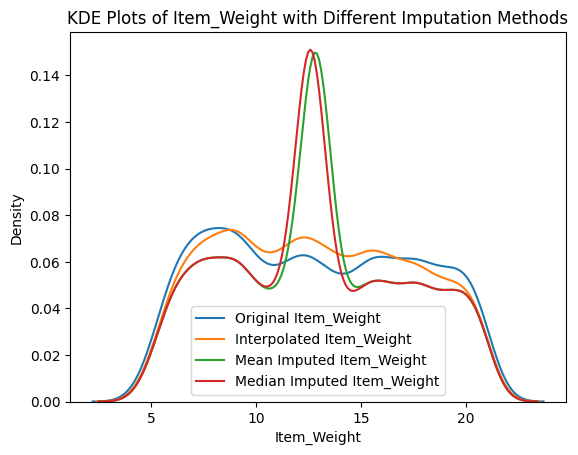

In [9]:
sns.kdeplot(df['Item_Weight'], label='Original Item_Weight')
sns.kdeplot(df['Item_weight_interpolated'], label='Interpolated Item_Weight')
sns.kdeplot(df['Item_Weight_mean'], label='Mean Imputed Item_Weight')
sns.kdeplot(df['Item_Weight_median'], label='Median Imputed Item_Weight')

plt.legend()

plt.title('KDE Plots of Item_Weight with Different Imputation Methods')
plt.xlabel('Item_Weight')
plt.ylabel('Density')
plt.show()

In [10]:
df["Item_Weight"] = df['Item_Weight'].interpolate(method = "linear")


In [11]:
Outlet_Size_mode = df['Outlet_Size'].mode()
print(Outlet_Size_mode)

0    Medium
Name: Outlet_Size, dtype: object


In [12]:
df['Item_Weight'] = df['Item_Weight'].fillna(Item_weight_mean) # to replace mean value for NAN in Item_Weight colomn
df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium') # to replace mean cout that is Medium in Outlet Size

In [13]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_mean             0
Item_Weight_median           0
Item_weight_interpolated     0
dtype: int64

## **DEALING WITH OUTLIERS**

---

In [14]:
Numerical_Variables = df.select_dtypes(include=['int64', 'float64'])

for col in Numerical_Variables.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    Outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Column: {col}")
    print(f"  Q1: {q1}")
    print(f"  Q3: {q3}")
    print(f"  IQR: {iqr}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Number of Outliers: {Outliers.shape[0]}")
    print()

Column: Item_Weight
  Q1: 9.0
  Q3: 16.6
  IQR: 7.600000000000001
  Lower Bound: -2.400000000000002
  Upper Bound: 28.000000000000004
  Number of Outliers: 0

Column: Item_Visibility
  Q1: 0.0269894775
  Q3: 0.0945852925
  IQR: 0.067595815
  Lower Bound: -0.07440424500000001
  Upper Bound: 0.195979015
  Number of Outliers: 144

Column: Item_MRP
  Q1: 93.8265
  Q3: 185.6437
  IQR: 91.8172
  Lower Bound: -43.8993
  Upper Bound: 323.3695
  Number of Outliers: 0

Column: Outlet_Establishment_Year
  Q1: 1987.0
  Q3: 2004.0
  IQR: 17.0
  Lower Bound: 1961.5
  Upper Bound: 2029.5
  Number of Outliers: 0

Column: Item_Outlet_Sales
  Q1: 834.2474
  Q3: 3101.2964
  IQR: 2267.049
  Lower Bound: -2566.3261
  Upper Bound: 6501.8699
  Number of Outliers: 186

Column: Item_Weight_mean
  Q1: 9.31
  Q3: 16.0
  IQR: 6.6899999999999995
  Lower Bound: -0.7249999999999996
  Upper Bound: 26.035
  Number of Outliers: 0

Column: Item_Weight_median
  Q1: 9.31
  Q3: 16.0
  IQR: 6.6899999999999995
  Lower Bound:

IQR: 7.600000000000001


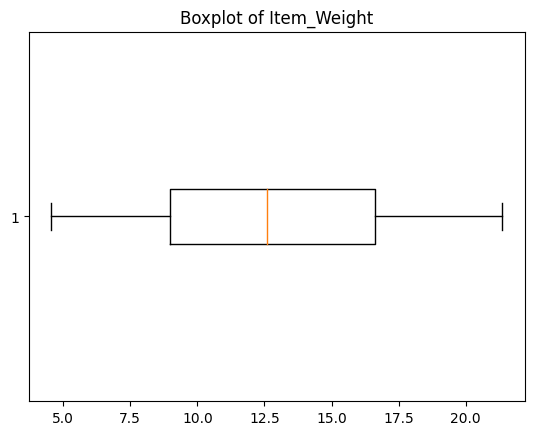


IQR: 0.067595815


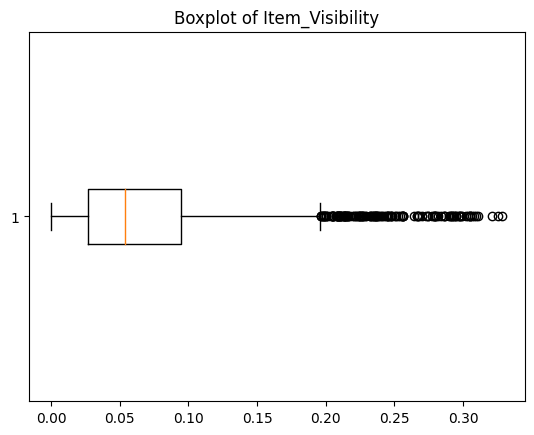


IQR: 91.8172


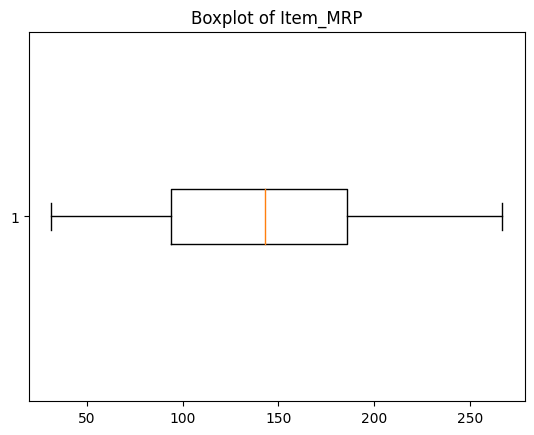


IQR: 17.0


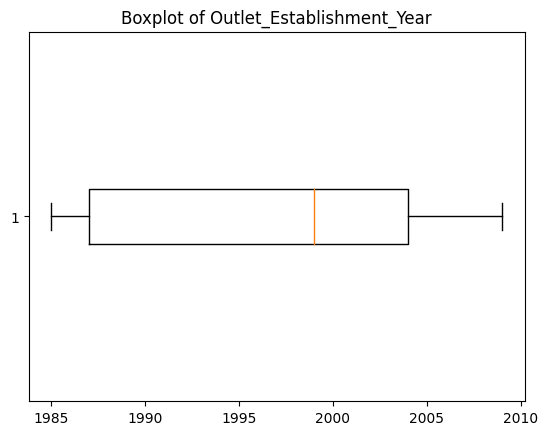


IQR: 2267.049


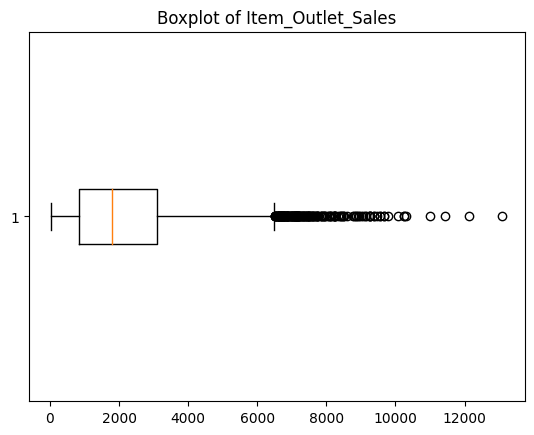


IQR: 6.6899999999999995


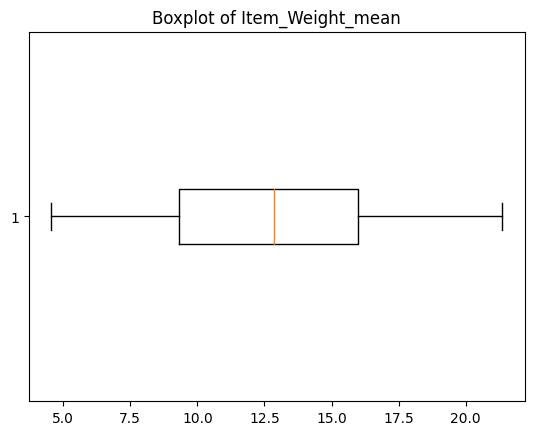


IQR: 6.6899999999999995


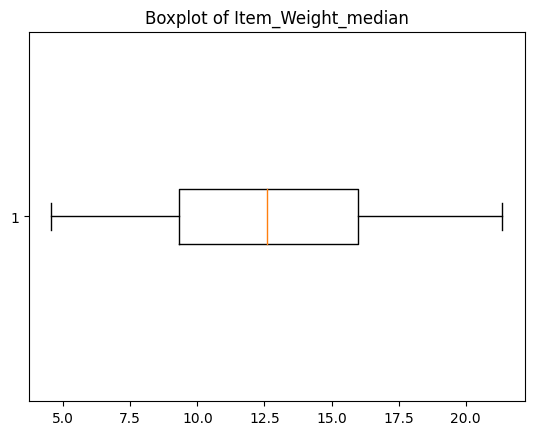


IQR: 7.600000000000001


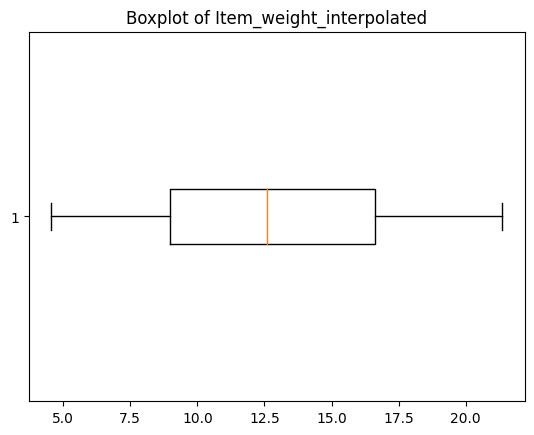

In [15]:
for col in Numerical_Variables.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    print('IQR:', iqr)
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)  
    plt.figure()
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.show()
    print()


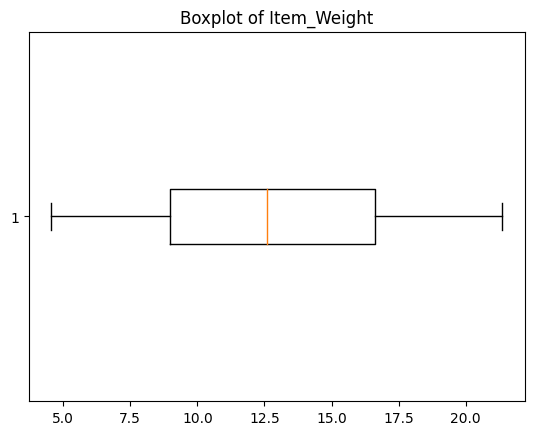

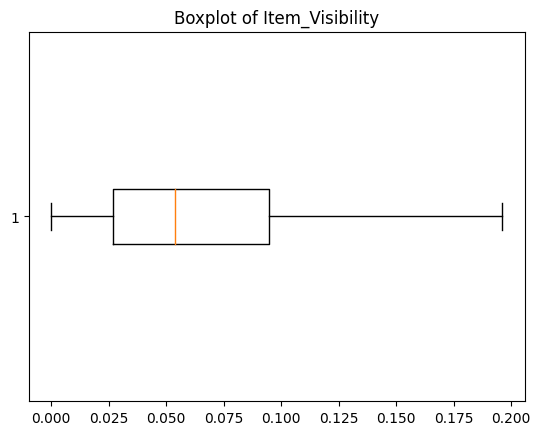

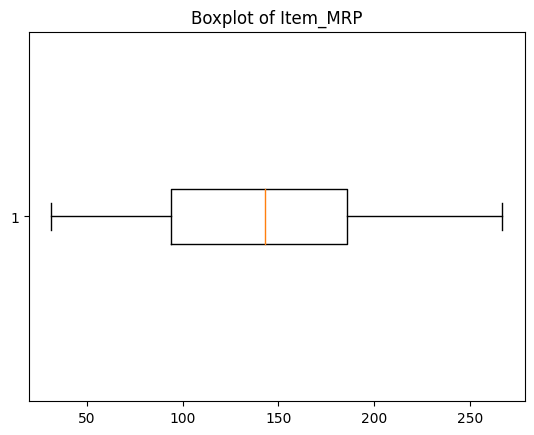

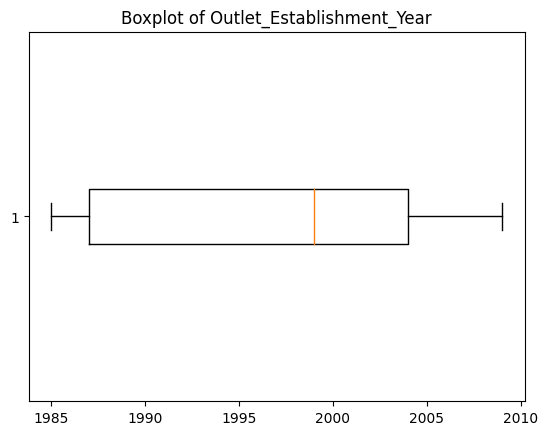

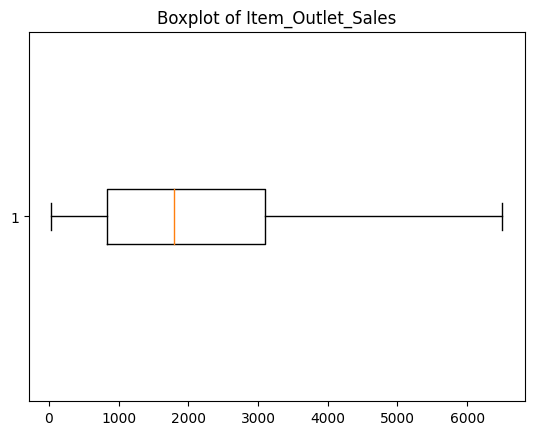

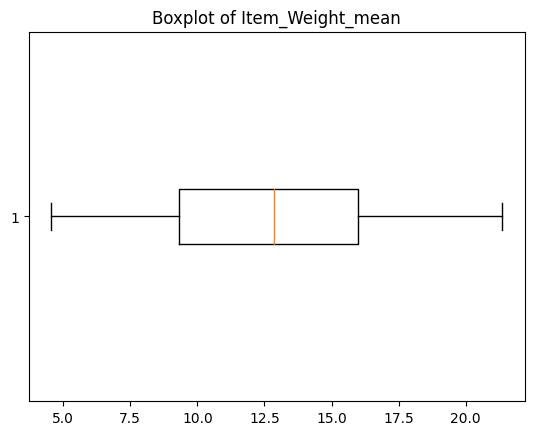

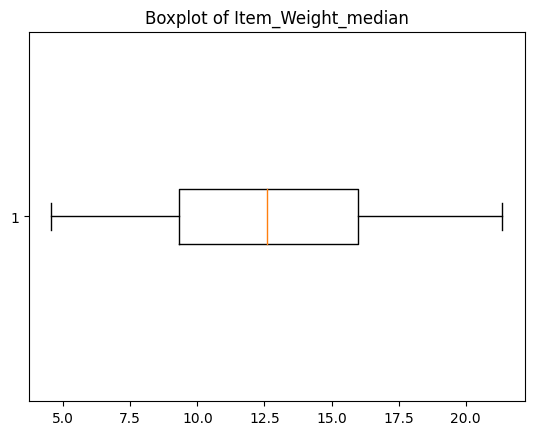

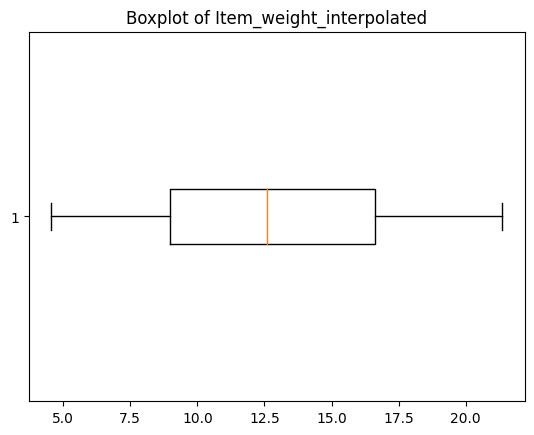

In [17]:
Numerical_Variables = df.select_dtypes(include = ['int64','float64'])
for col in Numerical_Variables:
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)
  iqr = q3-q1

  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)

  # Cap values beyond upper and lower bounds

  df[col] = df[col].clip(lower= lower_bound, upper = upper_bound)


  plt.figure()
  plt.boxplot(df[col], vert=False)
  plt.title(f'Boxplot of {col}')
  plt.show()
  print()


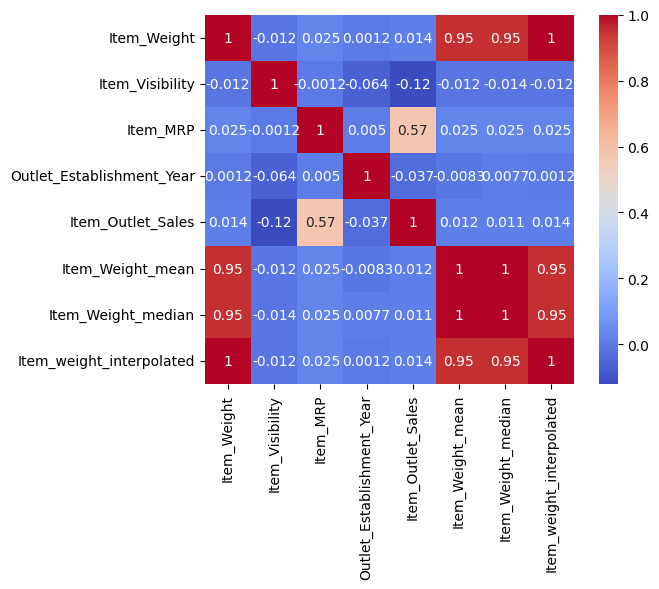

In [18]:
# Correlation Matrix for Numerical columns:

Numerical_Variables = df.select_dtypes(include = ['int64','float64'])
corr_matrix = df[Numerical_Variables.columns].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm' , square = True)
plt.show()

### From the above it can be conclude that item_Visibility column and Outlet_Establishment_Year has no impact on sale and other parameter and can be neglect.

In [19]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_mean',
       'Item_Weight_median', 'Item_weight_interpolated'],
      dtype='object')

In [20]:
df.drop(columns = ['Item_Visibility','Outlet_Establishment_Year',"Item_Weight_mean","Item_Weight_median","Item_weight_interpolated","Item_Identifier","Outlet_Identifier"], inplace = True)

In [21]:
df.head()

Item_Weight Item_Fat_Content              Item_Type  Item_MRP Outlet_Size  \
0         9.30          Low Fat                  Dairy  249.8092      Medium   
1         5.92          Regular            Soft Drinks   48.2692      Medium   
2        17.50          Low Fat                   Meat  141.6180      Medium   
3        19.20          Regular  Fruits and Vegetables  182.0950      Medium   
4         8.93          Low Fat              Household   53.8614        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228  
2               Tier 1  Supermarket Type1          2097.2700  
3               Tier 3      Grocery Store           732.3800  
4               Tier 3  Supermarket Type1           994.7052

# **EDA**


---



[]

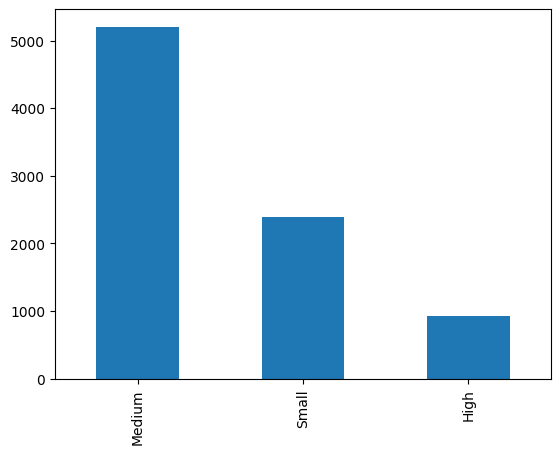

In [22]:
df['Outlet_Size'].value_counts().plot(kind = "bar")
plt.plot()

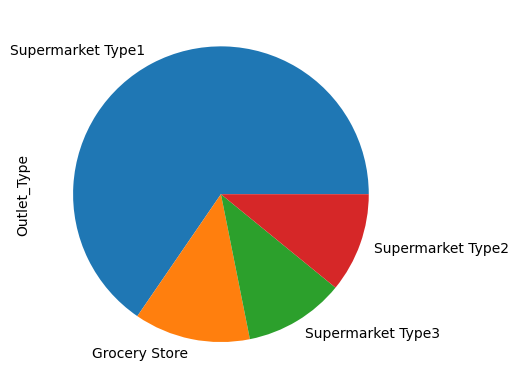

In [23]:
df["Outlet_Type"].value_counts().plot(kind = 'pie')
plt.show()


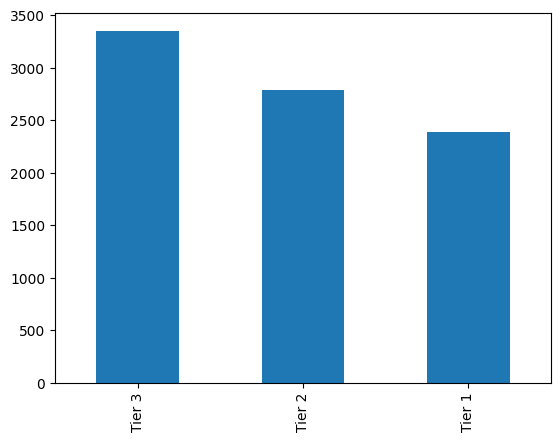

In [24]:
df["Outlet_Location_Type"].value_counts().plot(kind = 'bar')
plt.show()

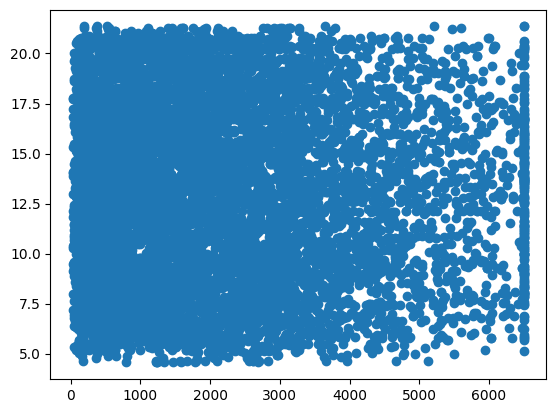

In [25]:
plt.scatter(df['Item_Outlet_Sales'], df['Item_Weight'])
plt.show()

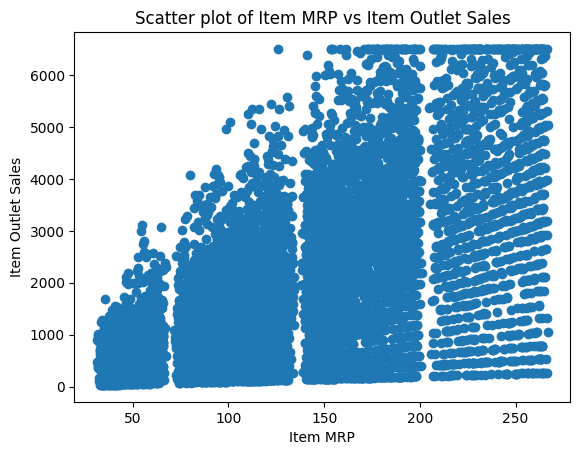

In [26]:
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'])
plt.xlabel('Item MRP') 
plt.ylabel('Item Outlet Sales') 
plt.title('Scatter plot of Item MRP vs Item Outlet Sales') 
plt.show()  


In [27]:
fig = px.pie(df, values = 'Item_Outlet_Sales', names = 'Outlet_Size', title = 'Sales by Outlet Size' )
fig.show()
fig = px.pie(df, values = 'Item_Outlet_Sales', names = 'Outlet_Type', title = 'Sales by Outlet Type')
fig.show()
fig = px.pie(df, values = 'Item_Outlet_Sales', names = 'Outlet_Location_Type', title = 'Sales by Outlet Location')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [28]:
sales_by_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

fig = px.bar(x = sales_by_item_type.index, y = sales_by_item_type.values, title = 'Sales by item type')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [29]:
sales_by_item_location_type = df.groupby(['Outlet_Location_Type', 'Item_Type'])['Item_Outlet_Sales'].sum().reset_index()
sales_by_item_location_type = sales_by_item_location_type.sort_values(by=['Outlet_Location_Type', 'Item_Outlet_Sales'], ascending=[True, False])
sales_by_item_location_type = sales_by_item_location_type.set_index(['Outlet_Location_Type', 'Item_Type'])
sales_by_item_location_type = sales_by_item_location_type['Item_Outlet_Sales'].round()
print(sales_by_item_location_type)

Outlet_Location_Type  Item_Type            
Tier 1                Fruits and Vegetables     662871.0
                      Snack Foods               650447.0
                      Household                 491220.0
                      Frozen Foods              473109.0
                      Dairy                     368435.0
                      Baking Goods              326773.0
                      Canned                    326347.0
                      Health and Hygiene        250819.0
                      Meat                      212218.0
                      Soft Drinks               192248.0
                      Breads                    136617.0
                      Hard Drinks               109312.0
                      Others                     93835.0
                      Starchy Foods              80816.0
                      Breakfast                  50148.0
                      Seafood                    39477.0
Tier 2                Snack Foods           

## ***Conslusion Based on EDA***
---

*   For the Outlet of all the stores , Tier 3 has highest sell then Tier 2 and Tier 3.
*   Tire 3 only have SuperMarket type 2 over other.
*Overall ~70% of Total sales comes from Supermarket type 1.
*Medium size Outlet holds majority of the sales.
* The Top Ten Majorly sold Items catogories are Fruits and Vegetables, Snack Foods,Household,Frozen Foods,Dairy,Canned,Baking Goods, Health and Hygiene,Meat,Soft Drinks,Breads and they somewhat differ per Tier.


---

In [30]:
df.head()

Item_Weight Item_Fat_Content              Item_Type  Item_MRP Outlet_Size  \
0         9.30          Low Fat                  Dairy  249.8092      Medium   
1         5.92          Regular            Soft Drinks   48.2692      Medium   
2        17.50          Low Fat                   Meat  141.6180      Medium   
3        19.20          Regular  Fruits and Vegetables  182.0950      Medium   
4         8.93          Low Fat              Household   53.8614        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228  
2               Tier 1  Supermarket Type1          2097.2700  
3               Tier 3      Grocery Store           732.3800  
4               Tier 3  Supermarket Type1           994.7052

In [31]:
numerical_cols = ['Item_Weight', 'Item_MRP']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df[numerical_cols]

Item_Weight  Item_MRP
0       -0.794459  1.747454
1       -1.554896 -1.489023
2        1.050388  0.010040
3        1.432856  0.660050
4       -0.877702 -1.399220
...           ...       ...
8518    -1.342289  1.180783
8519    -1.001442 -0.527301
8520    -0.501983 -0.897208
8521    -1.264670 -0.607977
8522     0.442938 -1.052261

[8523 rows x 2 columns]

In [32]:


encoder = LabelEncoder()

df["Item_Fat_Content"]  = encoder.fit_transform(df['Item_Fat_Content'])
df["Item_Type"]  = encoder.fit_transform(df['Item_Type'])
df["Outlet_Size"]  = encoder.fit_transform(df['Outlet_Size'])
df["Outlet_Location_Type"]  = encoder.fit_transform(df['Outlet_Location_Type'])
df["Outlet_Type"]  = encoder.fit_transform(df['Outlet_Type'])

In [33]:
df

Item_Weight  Item_Fat_Content  Item_Type  Item_MRP  Outlet_Size  \
0       -0.794459                 1          4  1.747454            1   
1       -1.554896                 2         14 -1.489023            1   
2        1.050388                 1         10  0.010040            1   
3        1.432856                 2          6  0.660050            1   
4       -0.877702                 1          9 -1.399220            0   
...           ...               ...        ...       ...          ...   
8518    -1.342289                 1         13  1.180783            0   
8519    -1.001442                 2          0 -0.527301            1   
8520    -0.501983                 1          8 -0.897208            2   
8521    -1.264670                 2         13 -0.607977            1   
8522     0.442938                 1         14 -1.052261            2   

      Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                        0            1          3735.1380  
1                        2            2           443.4228  
2                        0            1          2097.2700  
3                        2            0           732.3800  
4                        2            1           994.7052  
...                    ...          ...                ...  
8518                     2            1          2778.3834  
8519                     1            1           549.2850  
8520                     1            1          1193.1136  
8521                     2            2          1845.5976  
8522                     0            1           765.6700  

[8523 rows x 8 columns]

In [34]:
# Split the data into training and test sets
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6818, 7), (1705, 7), (6818,), (1705,))

In [36]:

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='linear', C=1, epsilon=0.1),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(learning_rate=0.1, n_estimators=100, random_state=42)
}

# Train and evaluate each model separately
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_pred)
   
    # Print the evaluation metrics
    print(f"Root Mean Squared Error: {mse:.2f}")
    print(f"Training Accuracy (R-squared): {r2_train*100:.2f}%")
    print(f"Testing Accuracy (R-squared): {r2_test*100:.2f}%")
    print("-" * 50)


Training Linear Regression...
Root Mean Squared Error: 1169313.17
Training Accuracy (R-squared): 51.00%
Testing Accuracy (R-squared): 53.30%
--------------------------------------------------
Training Random Forest Regressor...
Root Mean Squared Error: 1094052.72
Training Accuracy (R-squared): 93.64%
Testing Accuracy (R-squared): 56.31%
--------------------------------------------------
Training Gradient Boosting Regressor...
Root Mean Squared Error: 947318.02
Training Accuracy (R-squared): 63.24%
Testing Accuracy (R-squared): 62.17%
--------------------------------------------------
Training Support Vector Regressor...
Root Mean Squared Error: 1284170.70
Training Accuracy (R-squared): 46.29%
Testing Accuracy (R-squared): 48.71%
--------------------------------------------------
Training Decision Tree Regressor...
Root Mean Squared Error: 2073605.50
Training Accuracy (R-squared): 99.98%
Testing Accuracy (R-squared): 17.19%
--------------------------------------------------
Training XGB

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
trained_model = grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation R² Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
r2_test = best_model.score(X_test, y_test)
print("Test Set R² Score:", r2_test)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Validation R² Score: 0.6001598225347394
Test Set R² Score: 0.6236066917422922


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the models and their hyperparameters
models = {
    "Random Forest Regressor": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [500, 1000],
            "max_depth": [10, 15],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 5]
        }
    },
    "Decision Tree Regressor": {
        "model": DecisionTreeRegressor(),
        "params": {
            "max_depth": [10, 15],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 5]
        }
    },
    "XGBoost Regressor": {
        "model": XGBRegressor(),
        "params": {
            "n_estimators": [500, 1000],
            "max_depth": [10, 15],
            "learning_rate": [0.01, 0.005],
            "gamma": [0.1, 0.5]
        }
    }
}

# Perform hyperparameter tuning for each model
for model_name, model_info in models.items():
    print(f"Tuning hyperparameters for {model_name}...")

    # Perform Grid Search with hyperparameter tuning
    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=5, scoring="neg_mean_squared_error",verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and the corresponding score
    print(f"Best hyperparameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_}")

    # Train the model with the best hyperparameters and evaluate its performance
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2_train = best_model.score(X_train, y_train)
    r2_test = best_model.score(X_test, y_test)

    # Print the evaluation metrics
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print("-" * 50)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
trained_model = grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation R² Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
r2_test = best_model.score(X_test, y_test)
print("Test Set R² Score:", r2_test)



import pickle

with open('sales_prediction\model.pkl', 'rb') as model_file:
    trained_model = pickle.load(model_file)
    
    # Get input features from the user
input_features = []

# Assuming you have a list of feature names
feature_names = ['Item_Weight', 'Item_Fat_Content', 'Item_Type' , 'Item_MRP' ,'Outlet_Size','Outlet_Location_Type','Outlet_Type']

for feature_name in feature_names:
    value = float(input(f"Enter value for {feature_name}: "))
    input_features.append(value)

# Convert input features to a NumPy array
input_features_array = np.array(input_features).reshape(1, -1)

# Make predictions using the loaded model
predicted_sales = trained_model.predict(input_features_array)

print(f"Predicted : {predicted_sales}")

In [39]:
import joblib

# Save the model
joblib.dump(trained_model, 'model.pkl')



['model.pkl']

In [40]:

import numpy as np

# Load the model
trained_model = joblib.load('model.pkl')

# List of feature names
feature_names = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_MRP', 
                 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Get input features from the user
input_features = []
for feature_name in feature_names:
    try:
        value = float(input(f"Enter value for {feature_name}: "))
        input_features.append(value)
    except ValueError:
        print(f"Invalid input for {feature_name}. Please enter a numeric value.")
        exit()

# Convert input features to a NumPy array
input_features_array = np.array(input_features).reshape(1, -1)

# Make predictions using the loaded model
try:
    predicted_sales = trained_model.predict(input_features_array)
    print(f"Predicted sales: {predicted_sales[0]:.2f}")
except Exception as e:
    print(f"Error during prediction: {e}")


Predicted sales: 3524.52


c:\Users\Ashish Kumar Singh\Desktop\sales_prediction\ash\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names

